# Instalación e Importación librerías Spark y PySpark

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 212.4MB 67kB/s 
     |████████████████████████████████| 204kB 19.8MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=5a369ac061c0cc3dfc8d376e2a761a57e54f9f2cbb4440bcfdf6e41f6a4a04b4
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 36.5 MB of archives.
After this 

# Importamos los paquetes necesarios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
# ejecutamos spark
spark

## Cálculo de PI

Spark can also be used for compute-intensive tasks. This code estimates π by "throwing darts" at a circle. We pick random points in the unit square ((0, 0) to (1,1)) and see how many fall in the unit circle. The fraction should be π / 4, so we use this to get our estimate.

In [ ]:
import random
NUM_SAMPLES = 10000
def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1

count = sc.parallelize(range(0, NUM_SAMPLES)) \
             .filter(inside).count()

In [ ]:
pi = (4.0 * count / NUM_SAMPLES)
print(f"Pi is estimated as {pi}")

Pi is estimated as 3.1364


## Port Seguros - Modelo Predictivo - fase I

In [1]:
!unzip "/content/Porto-Seguro-s-claim-prediction-master.zip"

Archive:  /content/Porto-Seguro-s-claim-prediction-master.zip
ed66cf362bb7b09ad5fc5e5e8f7c06a4da5fe31c
   creating: Porto-Seguro-s-claim-prediction-master/
   creating: Porto-Seguro-s-claim-prediction-master/Bivariant/
  inflating: Porto-Seguro-s-claim-prediction-master/Bivariant/Figure_1.png  
  inflating: Porto-Seguro-s-claim-prediction-master/Bivariant/Figure_10.png  
  inflating: Porto-Seguro-s-claim-prediction-master/Bivariant/Figure_11.png  
  inflating: Porto-Seguro-s-claim-prediction-master/Bivariant/Figure_12.png  
  inflating: Porto-Seguro-s-claim-prediction-master/Bivariant/Figure_13.png  
  inflating: Porto-Seguro-s-claim-prediction-master/Bivariant/Figure_14.png  
  inflating: Porto-Seguro-s-claim-prediction-master/Bivariant/Figure_15.png  
  inflating: Porto-Seguro-s-claim-prediction-master/Bivariant/Figure_16.png  
  inflating: Porto-Seguro-s-claim-prediction-master/Bivariant/Figure_17.png  
  inflating: Porto-Seguro-s-claim-prediction-master/Bivariant/Figure_18.png  
  

In [2]:
!unrar e "/content/Porto-Seguro-s-claim-prediction-master/Data/train.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Porto-Seguro-s-claim-prediction-master/Data/train.rar

Extracting  train.csv                                                     20% 41% 61% 82% 99%  OK 
All OK


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
!nvidia-smi

Sun May 30 18:24:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

----- Training Done -----
Variables ordenadas por importancia:
 **************************************************
[(0.1237, 'ps_car_13'), (0.0686, 'ps_ind_05_cat_0'), (0.0644, 'ps_reg_03'), (0.0529, 'ps_ind_17_bin'), (0.0376, 'ps_reg_02'), (0.0269, 'ps_ind_03'), (0.026, 'ps_car_14'), (0.0232, 'ps_ind_15'), (0.0217, 'ps_ind_07_bin'), (0.0199, 'ps_car_12'), (0.0186, 'ps_car_07_cat_1'), (0.0178, 'ps_ind_06_bin'), (0.0177, 'ps_car_04_cat_0'), (0.0164, 'ps_calc_10'), (0.0161, 'ps_reg_01'), (0.016, 'ps_car_15'), (0.0159, 'ps_ind_04_cat_miss'), (0.0155, 'ps_ind_01'), (0.0143, 'ps_calc_11'), (0.0123, 'ps_calc_14'), (0.0116, 'ps_ind_05_cat_6'), (0.0112, 'ps_car_03_cat_miss'), (0.011, 'ps_ind_16_bin'), (0.011, 'ps_calc_01'), (0.0109, 'ps_calc_03'), (0.0107, 'ps_calc_02'), (0.0103, 'ps_calc_13'), (0.0097, 'ps_calc_08'), (0.0093, 'ps_calc_12'), (0.0093, 'ps_calc_07'), (0.0089, 'ps_calc_09'), (0.0088, 'ps_car_03_cat_1'), (0.0087, 'ps_calc_05'), (0.0081, 'ps_car_09_cat_1'), (0.0072, 'ps_ind_02_cat_

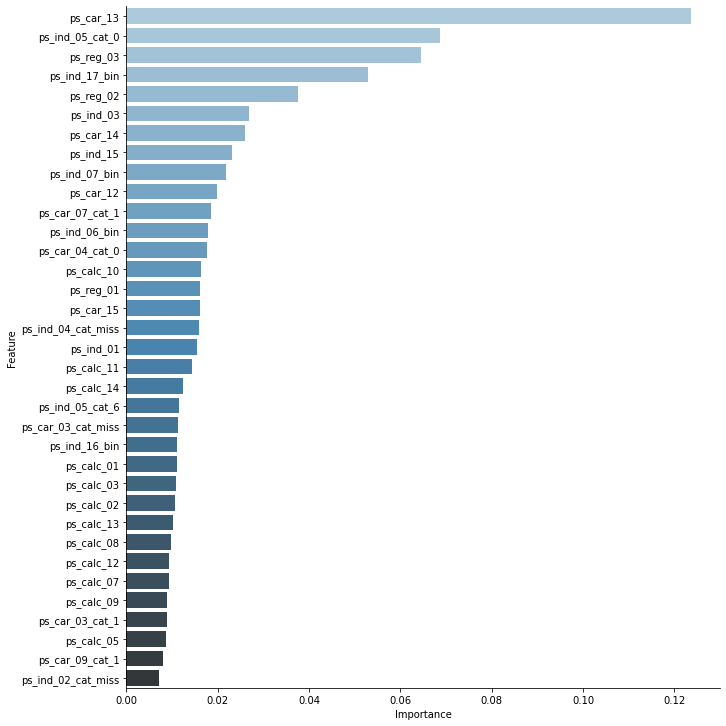

----- Training Done -----
Alfa= [-0.61589766] 
 Betas= [('ps_ind_01', 0.009892868173615104), ('ps_ind_03', 0.02692030860775632), ('ps_ind_06_bin', -0.2695281371522023), ('ps_ind_07_bin', -0.056377623787838206), ('ps_ind_08_bin', -0.04721415055226679), ('ps_ind_09_bin', -0.23552388901006988), ('ps_ind_10_bin', -0.025083442473408626), ('ps_ind_11_bin', -0.011323965223049756), ('ps_ind_12_bin', 0.0048246410835849005), ('ps_ind_13_bin', -0.022401132041757747), ('ps_ind_14', -0.053983898654630096), ('ps_ind_15', -0.03226957779455431), ('ps_ind_16_bin', -0.07335471785068814), ('ps_ind_17_bin', 0.2737041868604084), ('ps_ind_18_bin', -0.04585458714503616), ('ps_reg_01', 0.29656052460129845), ('ps_reg_02', 0.05609311881288972), ('ps_reg_03', 0.10529231998461581), ('ps_car_11', -0.008018832506913183), ('ps_car_12', 0.06289258612569934), ('ps_car_13', 0.5604372924521765), ('ps_car_14', -0.10033195800635017), ('ps_car_15', 0.05250523252847286), ('ps_calc_01', 0.039120775414869656), ('ps_calc_02', 

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


----- Training Done -----
best parametres:
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}

LightGBM ------------>
roc_auc=0.63607
Gini=0.27214
Epoch 1/15
477/477 - 14s - loss: 0.2263 - accuracy: 0.9609
Epoch 2/15
477/477 - 2s - loss: 0.1838 - accuracy: 0.9637
Epoch 3/15
477/477 - 2s - loss: 0.1719 - accuracy: 0.9637
Epoch 4/15
477/477 - 2s - loss: 0.1649 - accuracy: 0.9637
Epoch 5/15
477/477 - 2s - loss: 0.1606 - accuracy: 0.9637
Epoch 6/15
477/477 - 2s - loss: 0.1582 - accuracy: 0.9637
Epoch 7/15
477/477 - 2s - loss: 0.1567 - accuracy: 0.9637
Epoch 8/15
477/477 - 2s - loss: 0.1559 - accuracy: 0.9637
Epoch 9/

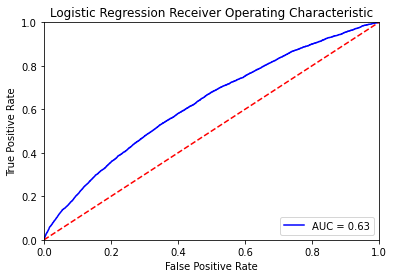

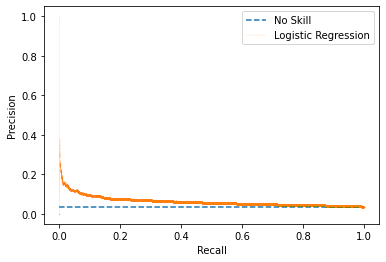

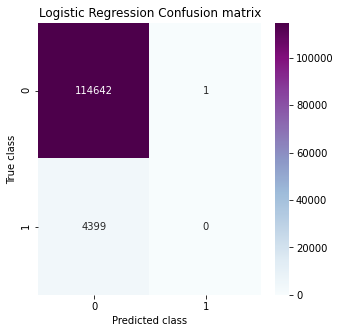


******************Logistic Regression**********************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114643
           1       0.00      0.00      0.00      4399

    accuracy                           0.96    119042
   macro avg       0.48      0.50      0.49    119042
weighted avg       0.93      0.96      0.94    119042



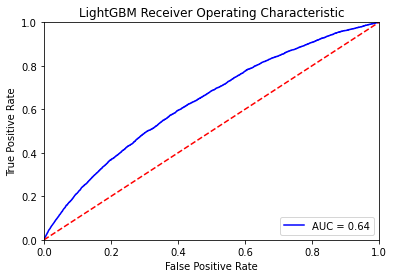

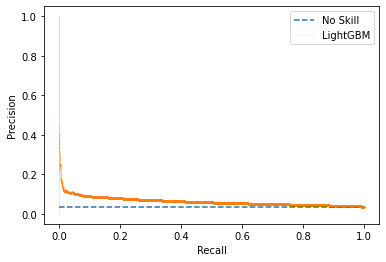

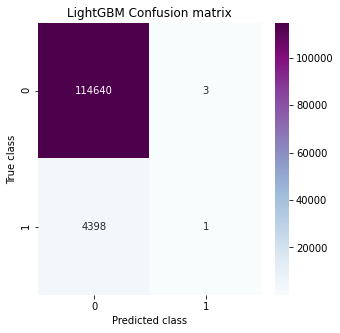


******************LightGBM**********************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114643
           1       0.25      0.00      0.00      4399

    accuracy                           0.96    119042
   macro avg       0.61      0.50      0.49    119042
weighted avg       0.94      0.96      0.94    119042



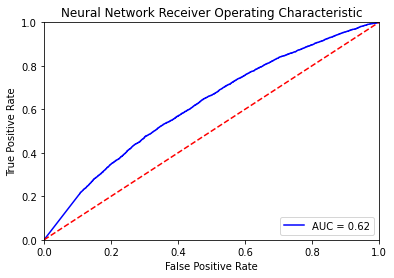

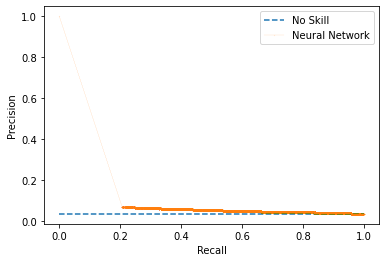

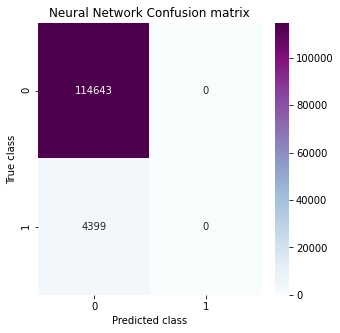


******************Neural Network**********************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114643
           1       0.00      0.00      0.00      4399

    accuracy                           0.96    119042
   macro avg       0.48      0.50      0.49    119042
weighted avg       0.93      0.96      0.94    119042



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


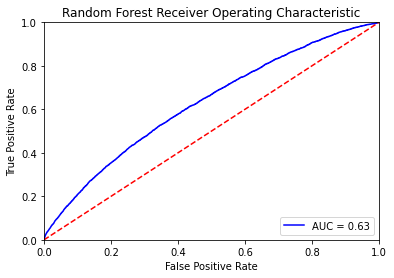

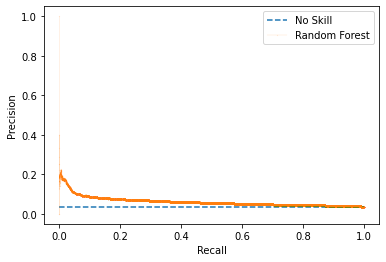

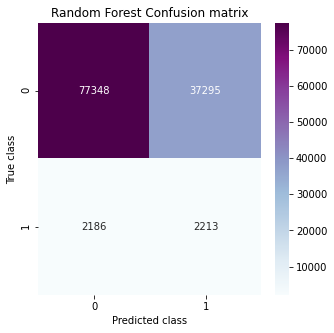


******************Random Forest**********************
              precision    recall  f1-score   support

           0       0.97      0.67      0.80    114643
           1       0.06      0.50      0.10      4399

    accuracy                           0.67    119042
   macro avg       0.51      0.59      0.45    119042
weighted avg       0.94      0.67      0.77    119042



In [6]:
import os
path="/content/Porto-Seguro-s-claim-prediction-master"
os.chdir(path+"/Scripts/")
# =============================================================================
# =============================================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import lightgbm as lgb
import scipy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras import models
from keras import layers
from keras import regularizers
from keras import losses
from keras import metrics as mtrc
from keras import optimizers


exec(open("Data.py").read())
exec(open("Missings.py").read())
exec(open("Plots.py").read())
exec(open("Split.py").read())
exec(open("RandomForestImportances.py").read())
exec(open("RegresionLogistica.py").read())
exec(open("LightGBM.py").read())
exec(open("NN.py").read())
exec(open("RandomForest.py").read())
exec(open("Threshold.py").read())


# =============================================================================
# =======================INSPECTION=========================================

data=Data(path+"/Data/")
dt=Missings(data)
y=dt["target"]
X=dt.drop(['id', 'target'],axis=1)

#Histogramas(X,y)
#Bivariantes(X,dt)
#Correlation(X)

X=pd.get_dummies(X)  
variables=RandomForestImportances(X, y, 35)

# =============================================================================
# =======================MODELS=========================================

X_train, X_test, y_train, y_test = Split(X,y)  

RL_train_probs,RL_test_probs = RegresionLogistica(X_train, y_train, X_test, y_test)
LGBM_train_probs, LGBM_test_probs = LightGBM(X_train, X_test, y_train, y_test)
NN_train_probs, NN_test_probs = NN(X_train, X_test, y_train, y_test)
RF_train_probs, RF_test_probs = RandomForest(X_train, X_test, y_train, y_test)

# logistic regression ensemble of previous models
X_train = pd.DataFrame({"RF":RF_train_probs, "NN":NN_train_probs,"LGBM":LGBM_train_probs})
X_test = pd.DataFrame({"RF":RF_test_probs, "NN":NN_test_probs,"LGBM":LGBM_test_probs})
RegresionLogisticaEnsemble(X_train, y_train, X_test, y_test)


# =============================================================================
# ==================== PREDICTION ANALYSIS ===============================

Roc_Auc(y_test,RL_test_probs, "Logistic Regression")
Precission_Recall(y_test,RL_test_probs, "Logistic Regression")
RL_test_pred = Threshold(RL_test_probs, 0.5)
mostrar_resultados(y_test, RL_test_pred, "Logistic Regression")

Roc_Auc(y_test,LGBM_test_probs, "LightGBM")
Precission_Recall(y_test,LGBM_test_probs, "LightGBM")
LGBM_test_pred = Threshold(LGBM_test_probs, 0.5)
mostrar_resultados(y_test, LGBM_test_pred, "LightGBM")

Roc_Auc(y_test,NN_test_probs, "Neural Network")
Precission_Recall(y_test,NN_test_probs, "Neural Network")
NN_test_pred = Threshold(NN_test_probs, 0.5)
mostrar_resultados(y_test, NN_test_pred, "Neural Network")

Roc_Auc(y_test,RF_test_probs, "Random Forest")
Precission_Recall(y_test,RF_test_probs, "Random Forest")
RF_test_pred = Threshold(RF_test_probs, 0.5)
mostrar_resultados(y_test, RF_test_pred, "Random Forest")


In [22]:
print("*^*"*10 + "Start " + LightGBM.__name__ + "*^*"*10)

*^**^**^**^**^**^**^**^**^**^*Start LightGBM*^**^**^**^**^**^**^**^**^**^*
